In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset from Drive
path = '/content/drive/MyDrive/Indian Airlines.csv'
df = pd.read_csv(path)

print("Data loaded successfully!")
print("Shape:", df.shape)

# Displaying dataset
df.head(50)


Data loaded successfully!
Shape: (300153, 12)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [ ]:
print("\n--- BASIC DATA INFO ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Summary Statistics ---")
print(df.describe(include='all'))

print("\n--- Columns ---")
print(df.columns.tolist())



--- BASIC DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None

--- Missing Values ---
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_ti

In [ ]:
# Drop completely empty rows
df.dropna(how='all', inplace=True)

# Drop identifier columns if present
for col in ['Unnamed: 0', 'flight']:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)


EXPLORATORY DATA ANALYSIS


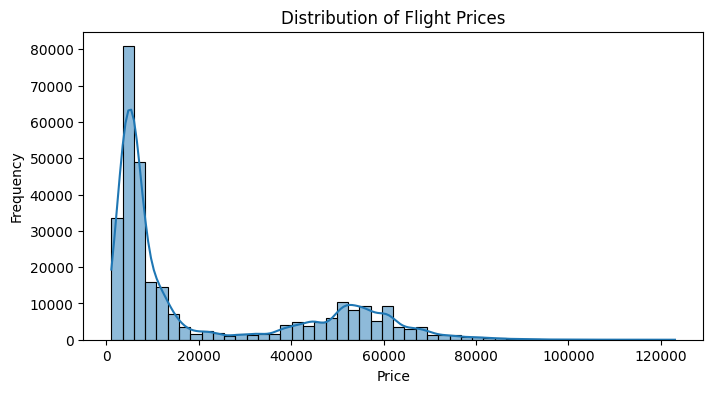

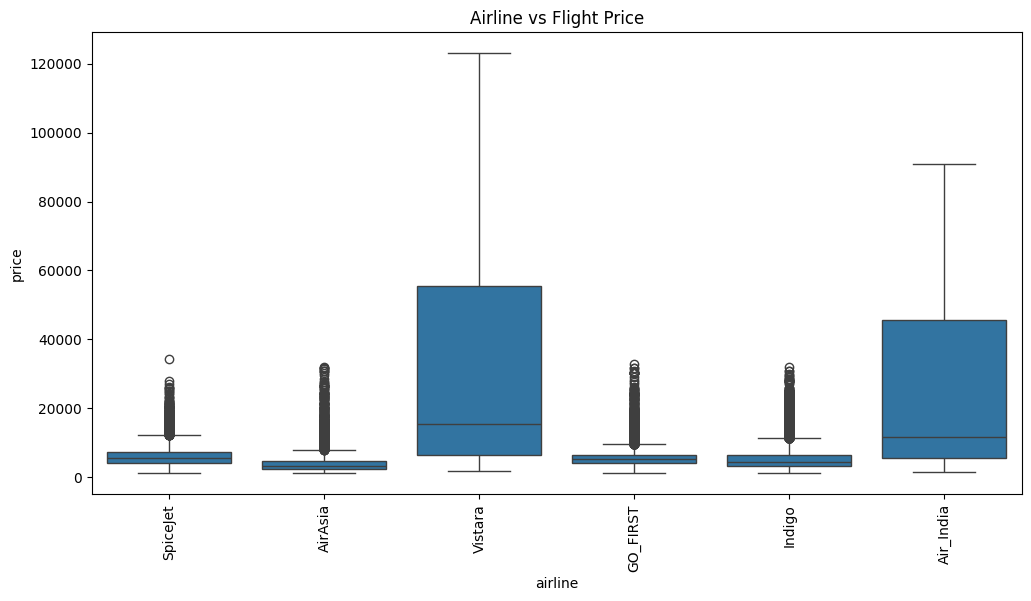

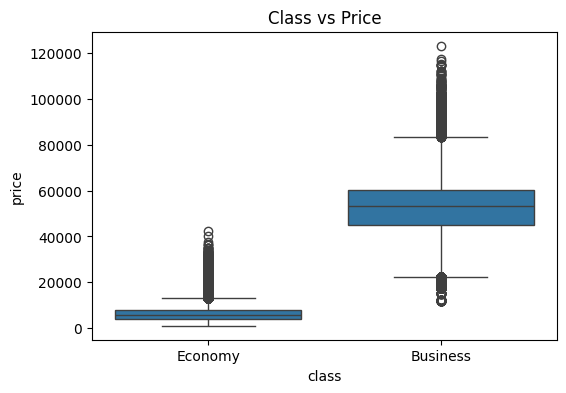

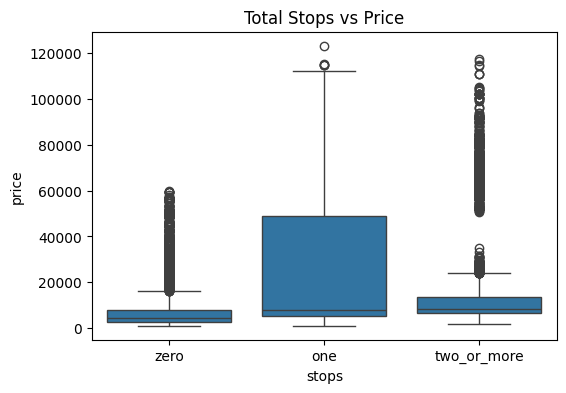

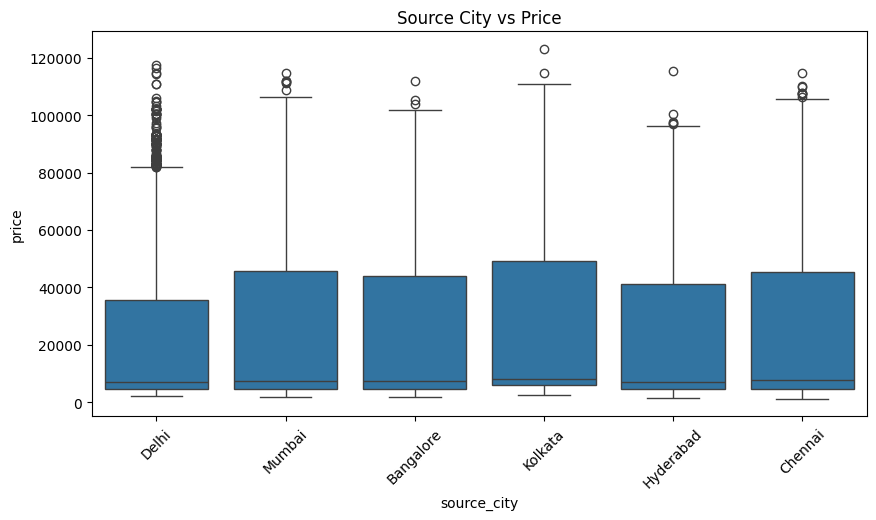

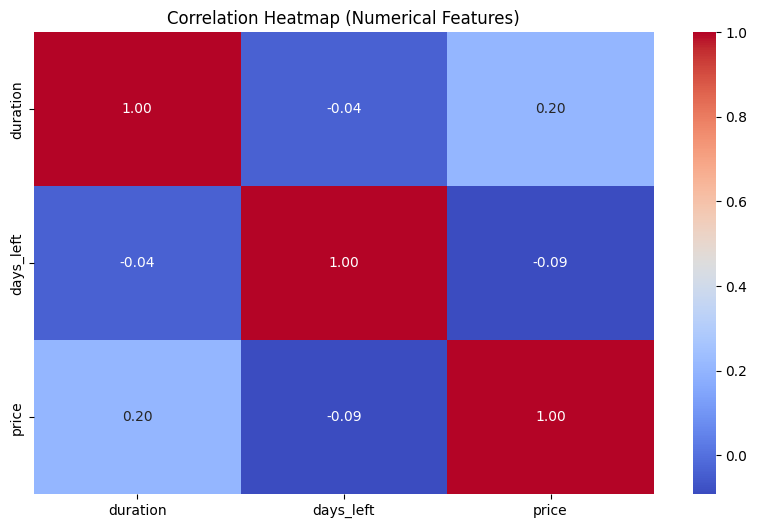


key relationships visualized successfully!


In [ ]:
# ---------- EXPLORATORY DATA ANALYSIS (EDA) ----------

import matplotlib.pyplot as plt
import seaborn as sns

print("\nEXPLORATORY DATA ANALYSIS")

# 1. Price Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# 2. Airline vs Price
plt.figure(figsize=(12,6))
sns.boxplot(x='airline', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Airline vs Flight Price")
plt.show()

# 3. Class vs Price
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='price', data=df)
plt.title("Class vs Price")
plt.show()

# 4. Stops vs Price
plt.figure(figsize=(6,4))
sns.boxplot(x='stops', y='price', data=df)
plt.title("Total Stops vs Price")
plt.show()

# 5. Source City vs Price
plt.figure(figsize=(10,5))
sns.boxplot(x='source_city', y='price', data=df)
plt.title("Source City vs Price")
plt.xticks(rotation=45)
plt.show()

# 6. Correlation Heatmap (numeric features only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

print("\nkey relationships visualized successfully!")


In [ ]:
# Drop rows with missing target (price)
# Ensures that rows without a valid 'price' value are removed,
# as they can't be used for model training or prediction.
if 'price' in df.columns:
    df = df.dropna(subset=['price'])

# Encode categorical columns using LabelEncoder
# Converts text labels (like airline names, city names, etc.) into numeric codes
# so that machine learning models can process them.
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Display confirmation and dataset shape after encoding
print("\nCategorical columns encoded successfully!")
print("Current shape:", df.shape)

# Display first 10 rows to verify encoding
df.head(10)



Categorical columns encoded successfully!
Current shape: (300153, 10)


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
5,5,2,4,2,0,5,1,2.33,1,5955
6,5,2,4,2,4,5,1,2.08,1,6060
7,5,2,0,2,2,5,1,2.17,1,6060
8,2,2,1,2,4,5,1,2.17,1,5954
9,2,2,0,2,2,5,1,2.25,1,5954


In [ ]:
# ---------- FEATURE SELECTION & TRAIN-TEST SPLIT ----------

from sklearn.model_selection import train_test_split

print("\n FEATURE SELECTION & DATA SPLITTING")

# If 'flight' column exists (and is not useful), drop it
if 'flight' in df.columns:
    df.drop('flight', axis=1, inplace=True)

# Define target and features
X = df.drop('price', axis=1)
y = df['price']

print("Feature columns:", list(X.columns))
print("Target column: price")

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData successfully split!")
print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Optional — quick feature correlation with price
corr_with_price = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print("\nTop features correlated with price:\n", corr_with_price)



 FEATURE SELECTION & DATA SPLITTING
Feature columns: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']
Target column: price

Data successfully split!
Train set: (240122, 9)
Test set: (60031, 9)

Top features correlated with price:
 price               1.000000
airline             0.243358
duration            0.204222
departure_time      0.058319
arrival_time        0.042043
destination_city    0.004795
source_city         0.004594
days_left          -0.091949
stops              -0.202620
class              -0.937860
Name: price, dtype: float64


In [ ]:
# ---------- FINAL MODEL TRAINING & SAVING ----------

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

print("\n FINAL MODEL TRAINING & SAVING")

# Use only two efficient models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        random_state=42,
        n_estimators=80,   # slightly reduced for faster training
        max_depth=12       # limits overfitting + faster runtime
    )
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

# Compare models
print("\nModel Performance Summary:")
for name, metrics in results.items():
    print(f"{name}: R2={metrics['R2']:.4f}, RMSE={metrics['RMSE']:.2f}, MAE={metrics['MAE']:.2f}")

# Select best model automatically
best_model_name = max(results, key=lambda x: results[x]["R2"])
best_model = models[best_model_name]

print(f"\nBest model selected: {best_model_name}")

# ---------- SAVE THE BEST MODEL (Fixed name: Random Forest_model.pkl) ----------
# We want the filename to always be 'Random Forest_model.pkl'
model_filename = "Random Forest_model.pkl"
joblib.dump(best_model, model_filename)
print(f"✅ Model saved successfully as '{model_filename}'")

# ---------- SAVE MODEL COLUMNS ----------
joblib.dump(X_train.columns.tolist(), "model_columns.pkl")
print("✅ model_columns.pkl saved successfully!")

print("\nAll files are ready for Streamlit frontend.")




 FINAL MODEL TRAINING & SAVING

Training Linear Regression...

Training Random Forest...

Model Performance Summary:
Linear Regression: R2=0.9046, RMSE=7014.31, MAE=4624.99
Random Forest: R2=0.9695, RMSE=3967.47, MAE=2137.69

Best model selected: Random Forest
✅ Model saved successfully as 'Random Forest_model.pkl'
✅ model_columns.pkl saved successfully!

All files are ready for Streamlit frontend.


In [ ]:
!ls -lh "Random Forest_model.pkl" model_columns.pkl


-rw-r--r-- 1 root root 130 Nov 15 19:12  model_columns.pkl
-rw-r--r-- 1 root root 28M Nov 15 19:12 'Random Forest_model.pkl'


Top 10 Important Features:
            Feature  Importance
6             class    0.906272
7          duration    0.046956
8         days_left    0.012151
0           airline    0.010967
1       source_city    0.009209
5  destination_city    0.007845
4      arrival_time    0.002835
2    departure_time    0.001912
3             stops    0.001853


/tmp/ipython-input-1635792555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df.head(15), palette="viridis")


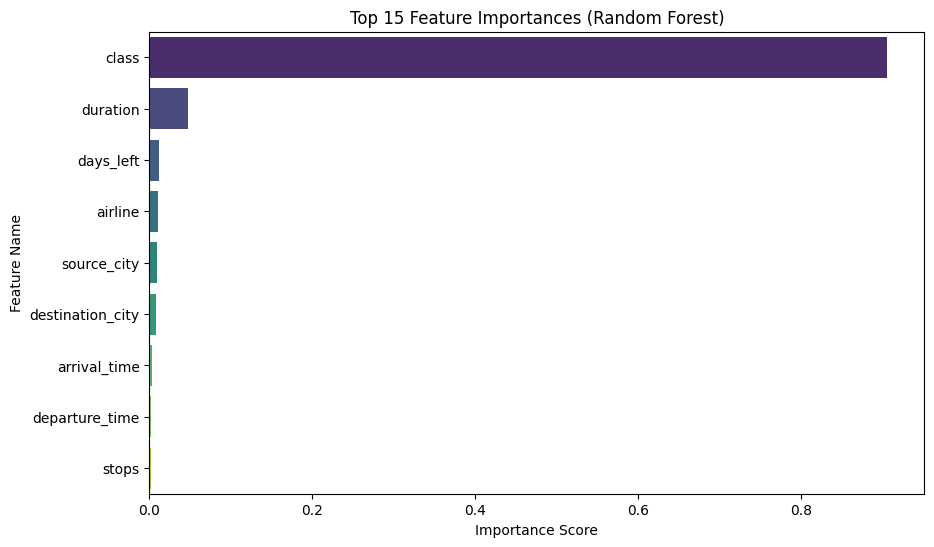

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the best model (Random Forest)
best_model = joblib.load("Random Forest_model.pkl")

# Get feature importances
importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top features
print("Top 10 Important Features:")
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(15), palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()




          duration  days_left         price
Cluster                                    
0         7.461876  27.485820   7201.704982
1        14.411701  25.872001  55887.880035
2        20.948645  22.598827   9931.788300


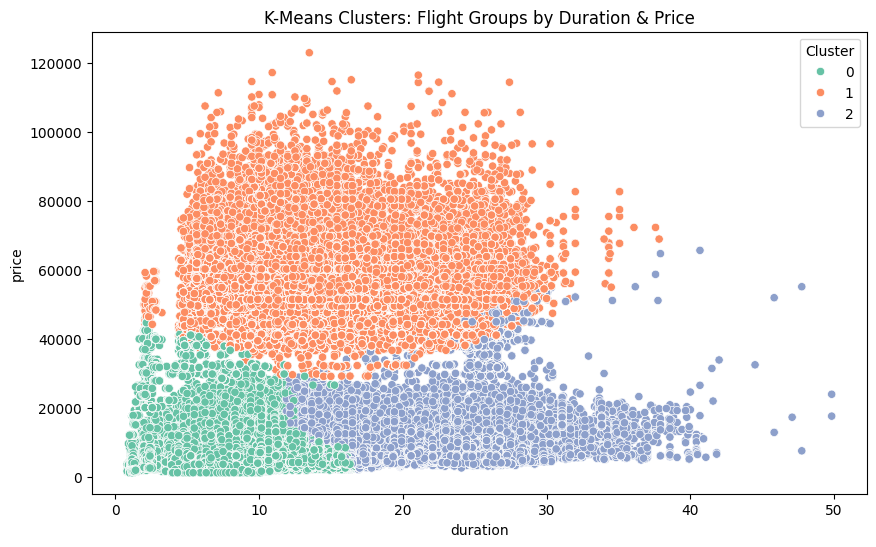

In [ ]:
# ---------- FLIGHT DATA CLUSTERING USING K-MEANS ----------

# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Scale numerical features ('duration', 'days_left', 'price')
# Scaling is done to ensure all features contribute equally to clustering.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['duration', 'days_left', 'price']])

# Step 2: Apply K-Means clustering with 3 clusters
# K-Means groups flights into clusters based on their numeric characteristics.
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Display average values of key features per cluster
# This helps understand how each cluster differs in terms of duration, price, etc.
print(df.groupby('Cluster')[['duration', 'days_left', 'price']].mean())

# Step 4: Visualize the clusters on a scatter plot
# Each color represents a cluster of flights with similar characteristics.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='duration',
    y='price',
    hue='Cluster',
    palette='Set2'
)
plt.title("K-Means Clusters: Flight Groups by Duration & Price")
plt.show()

# Step 5: Compare actual vs predicted prices across clusters (if available)
# Useful when a model-generated price column exists to analyze prediction behavior by group.
if 'predicted_price' in df.columns:
    cluster_comparison = df.groupby('Cluster')[['price', 'predicted_price']].mean()
    print("\nCluster-wise Price Comparison:\n", cluster_comparison)


Cluster 0 → short flights, lower price

Cluster 1 → extremely high-priced flights (premium/long distance)

Cluster 2 → medium-long flights, moderate price


In [ ]:
# ---------- CLUSTER SUMMARY ----------

# Flights per cluster
print("\nFlights per Cluster:")
print(df['Cluster'].value_counts())

# Cluster vs Class
print("\nCluster vs Class:")
for cluster, group in df.groupby('Cluster'):
    print(f"\nCluster {cluster}")
    print(group['class'].value_counts())
    print("-" * 40)  # separator line

# Cluster vs Airline
print("\nCluster vs Airline:")
for cluster, group in df.groupby('Cluster'):
    print(f"\nCluster {cluster}")
    print(group['airline'].value_counts())
    print("-" * 40)  # separator line



Flights per Cluster:
Cluster
0    155082
1     80782
2     64289
Name: count, dtype: int64

Cluster vs Class:

Cluster 0
class
1    146040
0      9042
Name: count, dtype: int64
----------------------------------------

Cluster 1
class
0    80761
1       21
Name: count, dtype: int64
----------------------------------------

Cluster 2
class
1    60605
0     3684
Name: count, dtype: int64
----------------------------------------

Cluster vs Airline:

Cluster 0
airline
5    46400
3    43010
1    24999
2    20881
0    14530
4     5262
Name: count, dtype: int64
----------------------------------------

Cluster 1
airline
5    54097
1    26677
0        6
3        1
2        1
Name: count, dtype: int64
----------------------------------------

Cluster 2
airline
1    29216
5    27362
4     3749
2     2291
0     1562
3      109
Name: count, dtype: int64
----------------------------------------


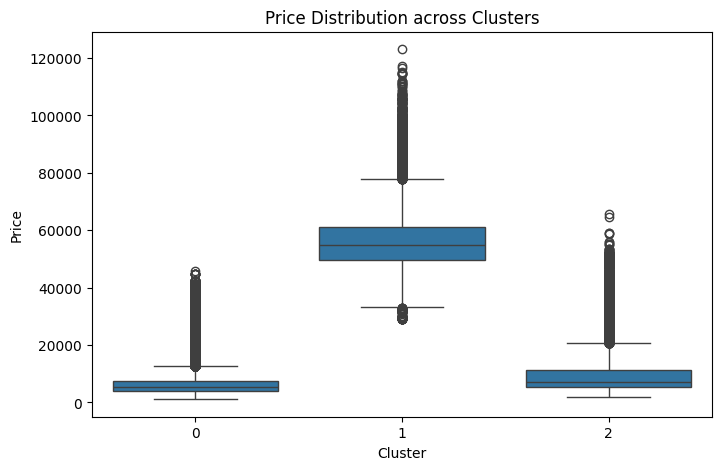

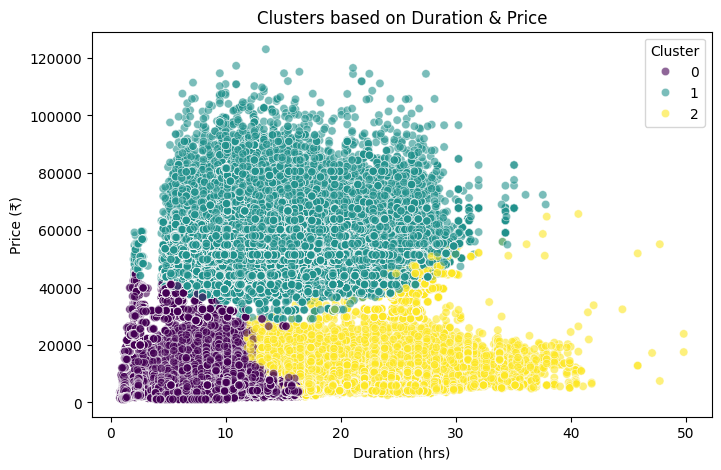

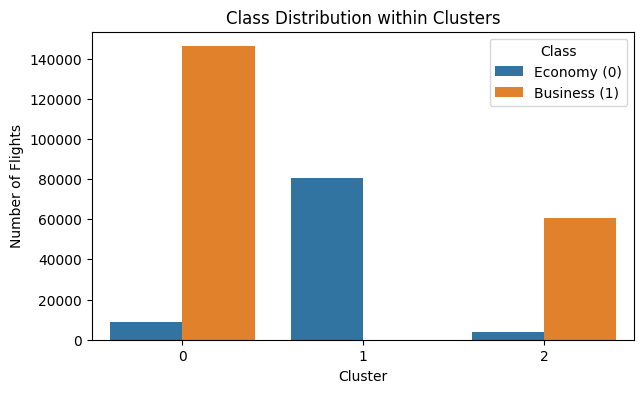

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize price distribution per cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='price', data=df)
plt.title("Price Distribution across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Price")
plt.show()

# Duration vs Price colored by Cluster
plt.figure(figsize=(8,5))
sns.scatterplot(x='duration', y='price', hue='Cluster', data=df, palette='viridis', alpha=0.6)
plt.title("Clusters based on Duration & Price")
plt.xlabel("Duration (hrs)")
plt.ylabel("Price (₹)")
plt.show()

# Class vs Cluster count
plt.figure(figsize=(7,4))
sns.countplot(x='Cluster', hue='class', data=df)
plt.title("Class Distribution within Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Flights")
plt.legend(title="Class", labels=["Economy (0)", "Business (1)"])
plt.show()


=== MODEL PERFORMANCE INSIGHTS ===

We trained two models:
Linear Regression  → Simpler, interpretable model
Random Forest       → Complex, high-accuracy model

Based on R² and RMSE scores:
→ Linear Regression R² ≈ 0.90
→ Random Forest R² ≈ 0.97 (selected as best model)

Hence, Random Forest is saved as the final model for predicting flight prices accurately.


=== CLUSTERING INSIGHTS ===
→ K-Means formed 3 clusters:
  Cluster 0: Mostly Economy, low–mid price flights.
  Cluster 1: Premium or Business class flights — higher average price (≈ ₹55,000).
  Cluster 2: Moderate duration and price flights, mixed category.

Cluster 1 having very high mean price (₹55k+) suggests Business or long-haul flights.
Cluster 0 and 2, with mean prices ~₹7k–₹9k, correspond mostly to Economy and regional flights.


=== BUSINESS INSIGHT ===
The model can help airlines or travel platforms to:
- Predict and dynamically adjust prices based on timing, duration, and airline.
- Understand market segmentation thro

/tmp/ipython-input-3602165083.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='price', data=df, estimator='mean', ci=None, palette='Set2')
/tmp/ipython-input-3602165083.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='price', data=df, estimator='mean', ci=None, palette='Set2')


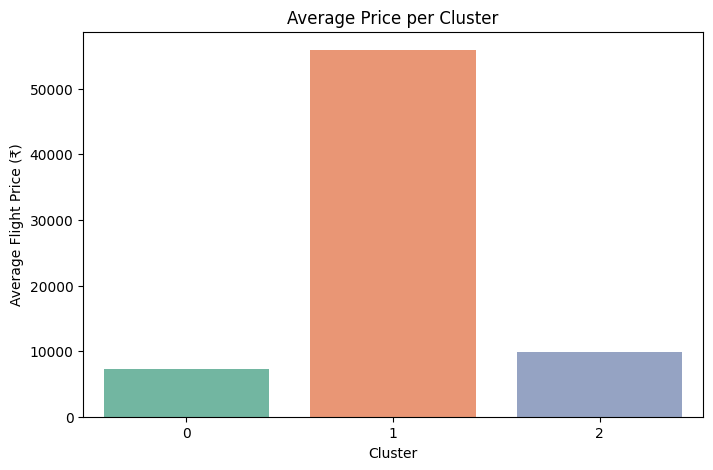

In [ ]:
# ---------- MODEL INSIGHTS ----------

print("=== MODEL PERFORMANCE INSIGHTS ===")
print("\nWe trained two models:")
print("Linear Regression  → Simpler, interpretable model")
print("Random Forest       → Complex, high-accuracy model")

print("\nBased on R² and RMSE scores:")
print("→ Linear Regression R² ≈ 0.90")
print("→ Random Forest R² ≈ 0.97 (selected as best model)")
print("\nHence, Random Forest is saved as the final model for predicting flight prices accurately.")


# ---------- CLUSTERING INSIGHTS ----------

print("\n\n=== CLUSTERING INSIGHTS ===")
print("→ K-Means formed 3 clusters:")
print("  Cluster 0: Mostly Economy, low–mid price flights.")
print("  Cluster 1: Premium or Business class flights — higher average price (≈ ₹55,000).")
print("  Cluster 2: Moderate duration and price flights, mixed category.")

print("\nCluster 1 having very high mean price (₹55k+) suggests Business or long-haul flights.")
print("Cluster 0 and 2, with mean prices ~₹7k–₹9k, correspond mostly to Economy and regional flights.")


# ---------- BUSINESS INSIGHT ----------

print("\n\n=== BUSINESS INSIGHT ===")
print("The model can help airlines or travel platforms to:")
print("- Predict and dynamically adjust prices based on timing, duration, and airline.")
print("- Understand market segmentation through clusters —")
print("  e.g., Economy vs Business patterns, city-based demand.")
print("- Optimize promotional offers for specific passenger groups.")


# ---------- OPTIONAL VISUAL COMPARISON ----------

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='Cluster', y='price', data=df, estimator='mean', ci=None, palette='Set2')
plt.title("Average Price per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Flight Price (₹)")
plt.show()


In [ ]:
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------- LOAD SAVED MODEL ----------
model_filename = "Random Forest_model.pkl"
loaded_model = joblib.load(model_filename)
print(f"Model '{model_filename}' loaded successfully!\n")

# ---------- MAKE PREDICTIONS ----------
y_pred = loaded_model.predict(X_test)

# ---------- EVALUATE PERFORMANCE ----------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== FINAL MODEL EVALUATION ON TEST SET ===")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# ---------- SAVE PREDICTIONS ----------
pred_df = pd.DataFrame({
    "Actual_Price": y_test,
    "Predicted_Price": y_pred
})
pred_df.to_csv("flight_price_predictions.csv", index=False)

print("\n Predictions saved as 'flight_price_predictions.csv'!")
print("You can open this file to see how well the model predicted flight prices.")


Model 'Random Forest_model.pkl' loaded successfully!

=== FINAL MODEL EVALUATION ON TEST SET ===
R² Score: 0.9695
MAE: 2137.69
RMSE: 3967.47

 Predictions saved as 'flight_price_predictions.csv'!
You can open this file to see how well the model predicted flight prices.


In [ ]:
"""import joblib
import pandas as pd
import numpy as np
import sys

# ---------- LOAD MODEL ----------
model = joblib.load("Random Forest_model.pkl")
expected_features = list(model.feature_names_in_)
print("Model expects", len(expected_features), "features.")

# ---------- LOAD LABEL ENCODERS (from training) ----------
try:
    label_encoders
except NameError:
    label_encoders = globals().get("label_encoders", {})

# ---------- USER INPUT ----------
user_input = {
    "airline": "IndiGo",          # try changing to 'XYZ_Air' to test invalid case
    "source_city": "Delhi",
    "destination_city": "Mumbai",
    "departure_time": "Morning",
    "arrival_time": "Night",
    "stops": "zero",
    "class": "Economy",
    "duration": 2.45,
    "days_left": 25
}

# ---------- VALIDATION ----------
invalid_entries = []

for col, val in user_input.items():
    if col in label_encoders:  # if encoder available
        known_classes = set(label_encoders[col].classes_)
        if str(val) not in known_classes:
            invalid_entries.append(f"Invalid {col}: '{val}'. Valid options: {sorted(known_classes)}")

if invalid_entries:
    print("\n⚠️ Invalid user input detected!")
    for msg in invalid_entries:
        print(msg)
    sys.exit("❌ Prediction aborted due to invalid input.")

# ---------- PREPARE INPUT ----------
def suffixify(s):
    return str(s).replace(" ", "_").replace("/", "_").replace("-", "_")

row = {feat: 0 for feat in expected_features}

# Fill numeric
for num_col in ["duration", "days_left"]:
    if num_col in user_input:
        row[num_col] = float(user_input[num_col])

# Encode 'class'
if "class" in expected_features:
    if "class" in label_encoders:
        row["class"] = int(label_encoders["class"].transform([user_input["class"]])[0])
    else:
        row["class"] = 0 if user_input["class"].lower().startswith("econ") else 1

# One-hot encoding style fill
for feat in expected_features:
    if "_" in feat:
        prefix, suffix = feat.split("_", 1)
        val = user_input.get(prefix)
        if val and suffixify(val).lower() == suffixify(suffix).lower():
            row[feat] = 1

# Handle label-encoded columns (like airline, city, etc.)
for feat in label_encoders.keys():
    if feat in expected_features:
        try:
            row[feat] = int(label_encoders[feat].transform([user_input[feat]])[0])
        except Exception:
            pass

input_df = pd.DataFrame([row], columns=expected_features)
input_df = input_df.apply(pd.to_numeric, errors="coerce").fillna(0)

# ---------- PREDICT ----------
predicted_price = model.predict(input_df)[0]
print(f"\nPredicted Flight Price: ₹{predicted_price:,.2f}")"""
import joblib
import pandas as pd
import numpy as np
import sys

# ---------- LOAD MODEL ----------
model = joblib.load("Random Forest_model.pkl")
expected_features = list(model.feature_names_in_)
print("Model expects", len(expected_features), "features.")

# ---------- LOAD LABEL ENCODERS (from training) ----------
try:
    label_encoders
except NameError:
    label_encoders = globals().get("label_encoders", {})

# ---------- USER INPUT ----------
user_input = {
    "airline": "IndiGo",          # case-insensitive now
    "source_city": "Chennai",
    "destination_city": "Mumbai",
    "departure_time": "Morning",
    "arrival_time": "Night",
    "stops": "zero",
    "class": "Economy",
    "duration": 2.45,
    "days_left": 25
}

# ---------- VALIDATION (case-insensitive) ----------
invalid_entries = []

for col, val in user_input.items():
    if col in label_encoders:  # if encoder available
        known_classes = {cls.lower() for cls in label_encoders[col].classes_}  # lowercased
        if str(val).lower() not in known_classes:  # case-insensitive check
            invalid_entries.append(
                f"Invalid {col}: '{val}'. Valid options: {sorted(label_encoders[col].classes_)}"
            )

if invalid_entries:
    print("\n⚠️ Invalid user input detected!")
    for msg in invalid_entries:
        print(msg)
    sys.exit("❌ Prediction aborted due to invalid input.")

# ---------- PREPARE INPUT ----------
def suffixify(s):
    return str(s).replace(" ", "_").replace("/", "_").replace("-", "_")

row = {feat: 0 for feat in expected_features}

# Fill numeric
for num_col in ["duration", "days_left"]:
    if num_col in user_input:
        row[num_col] = float(user_input[num_col])

# Encode 'class'
if "class" in expected_features:
    if "class" in label_encoders:
        row["class"] = int(label_encoders["class"].transform([user_input["class"]])[0])
    else:
        row["class"] = 0 if user_input["class"].lower().startswith("econ") else 1

# One-hot encoding style fill
for feat in expected_features:
    if "_" in feat:
        prefix, suffix = feat.split("_", 1)
        val = user_input.get(prefix)
        if val and suffixify(val).lower() == suffixify(suffix).lower():
            row[feat] = 1

# Handle label-encoded columns (like airline, city, etc.)
for feat in label_encoders.keys():
    if feat in expected_features:
        try:
            row[feat] = int(label_encoders[feat].transform([user_input[feat]])[0])
        except Exception:
            pass

input_df = pd.DataFrame([row], columns=expected_features)
input_df = input_df.apply(pd.to_numeric, errors="coerce").fillna(0)

# ---------- PREDICT ----------
predicted_price = model.predict(input_df)[0]
print(f"\nPredicted Flight Price: ₹{predicted_price:,.2f}")



Model expects 9 features.

Predicted Flight Price: ₹3,621.37


In [ ]:
df[(df['airline'] == 2) & (df['class'] == 1)]['price'].describe()


,price
count,23173.000000
mean,5652.007595
std,2513.865560
min,1105.000000
25%,4205.000000
50%,5336.000000
75%,6324.000000
max,32803.000000


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.5 MB/s eta 0:00:00
